# Network Testing

## Includes

In [3]:
import os, sys
import ipdb
import torch as t
import torchvision as tv

# add paths for all sub-folders
paths = [root for root, dirs, files in os.walk(".")]

for item in paths:
    sys.path.append(item)

from ipynb.fs.full.module import BasicModule
from ipynb.fs.full.network import TransformNet

## Testing

Automatic pdb calling has been turned ON


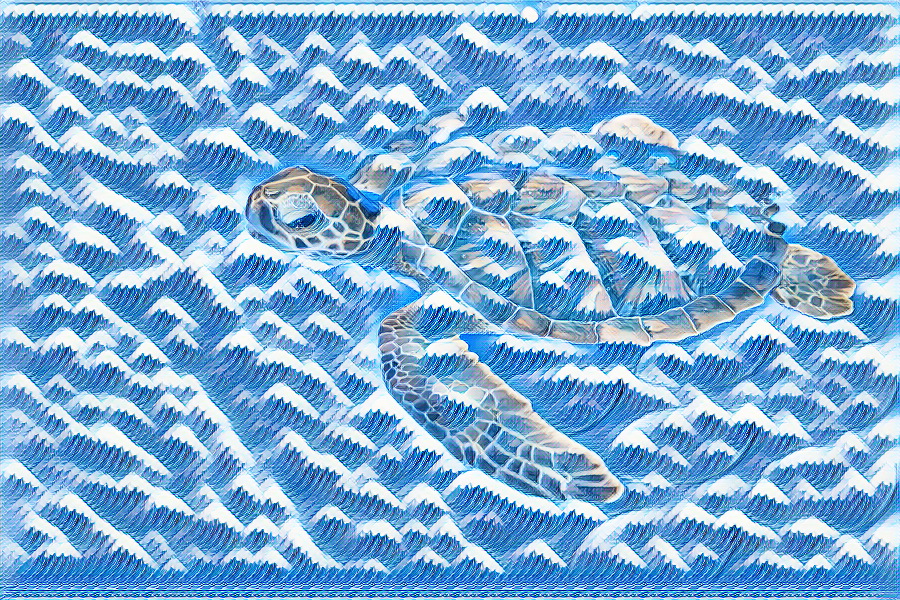

In [4]:
# enable debug
%pdb on

device = t.device('cpu')

# load data
path_img = './turtle_origin.jpg'
path_model = './saves/style_1.pth'

# load pre-trained model
model = TransformNet().to(device)  # transform net
model.load_state_dict(t.load(path_model, map_location='cpu'))
model.eval()

# run network
transforms = tv.transforms.Compose(
    [tv.transforms.ToTensor(),
     tv.transforms.Lambda(lambda x: x * 255)])
img_test = tv.datasets.folder.default_loader(path_img)
img_test = transforms(img_test).to(device)
img_result = model(img_test.unsqueeze(0))

# show result
show = tv.transforms.ToPILImage()
show(img_result.squeeze() / 255)